In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("diabetes.csv")

In [136]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [137]:
df.shape

(768, 9)

In [138]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [140]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [141]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [142]:
from sklearn.utils import resample

df_majority = df[df['Outcome'] ==0]
df_minority = df[df['Outcome'] ==1]


In [143]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority))

In [144]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [145]:
df = df_upsampled

In [146]:
df.Outcome.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [147]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
242,3,139,54,0,0,25.6,0.402,22,1
681,0,162,76,36,0,49.6,0.364,26,1
130,4,173,70,14,168,29.7,0.361,33,1
171,6,134,70,23,130,35.4,0.542,29,1
689,1,144,82,46,180,46.1,0.335,46,1


In [148]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

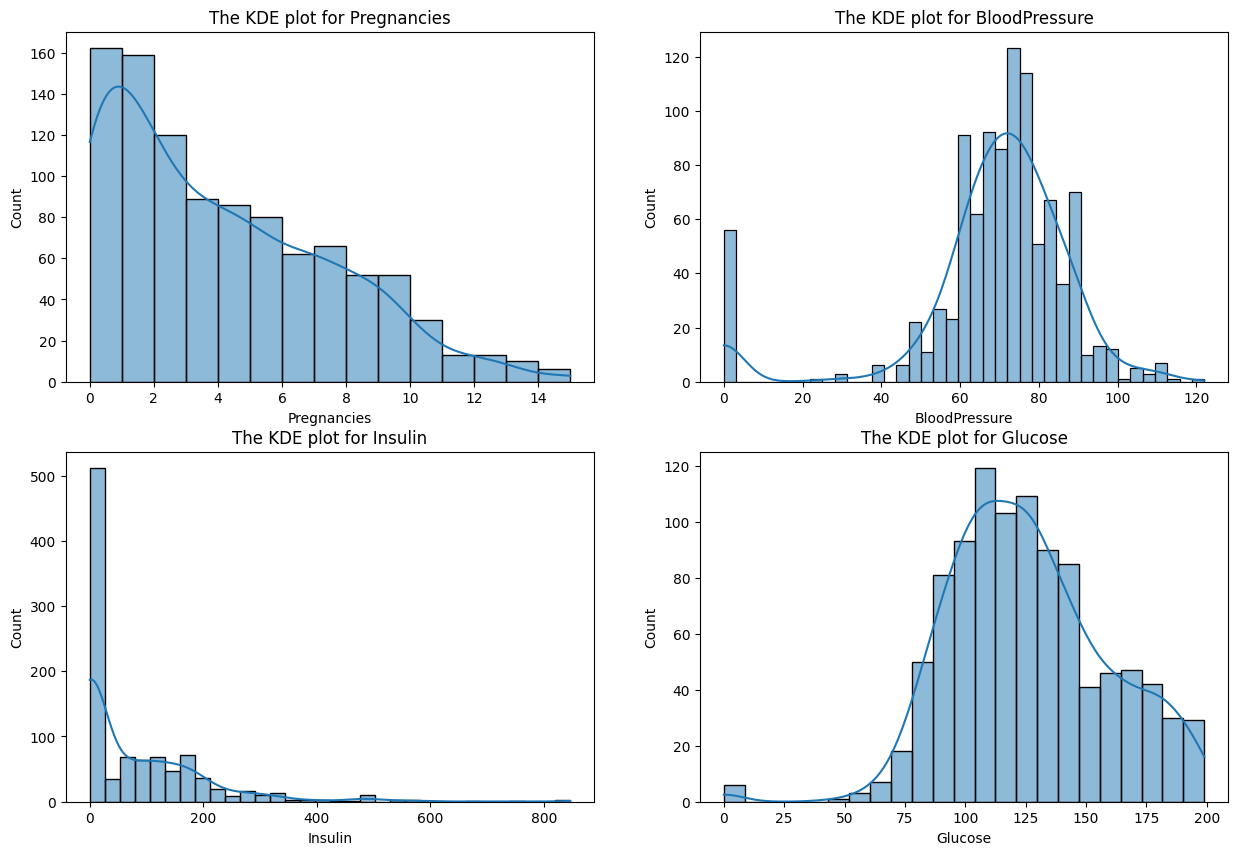

In [149]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['Pregnancies', 'BloodPressure', 'Insulin', 'Glucose']):
    plt.subplot(2,2,i+1)
    sns.histplot(df[column], kde = True)
    plt.title(f"The KDE plot for {column}")

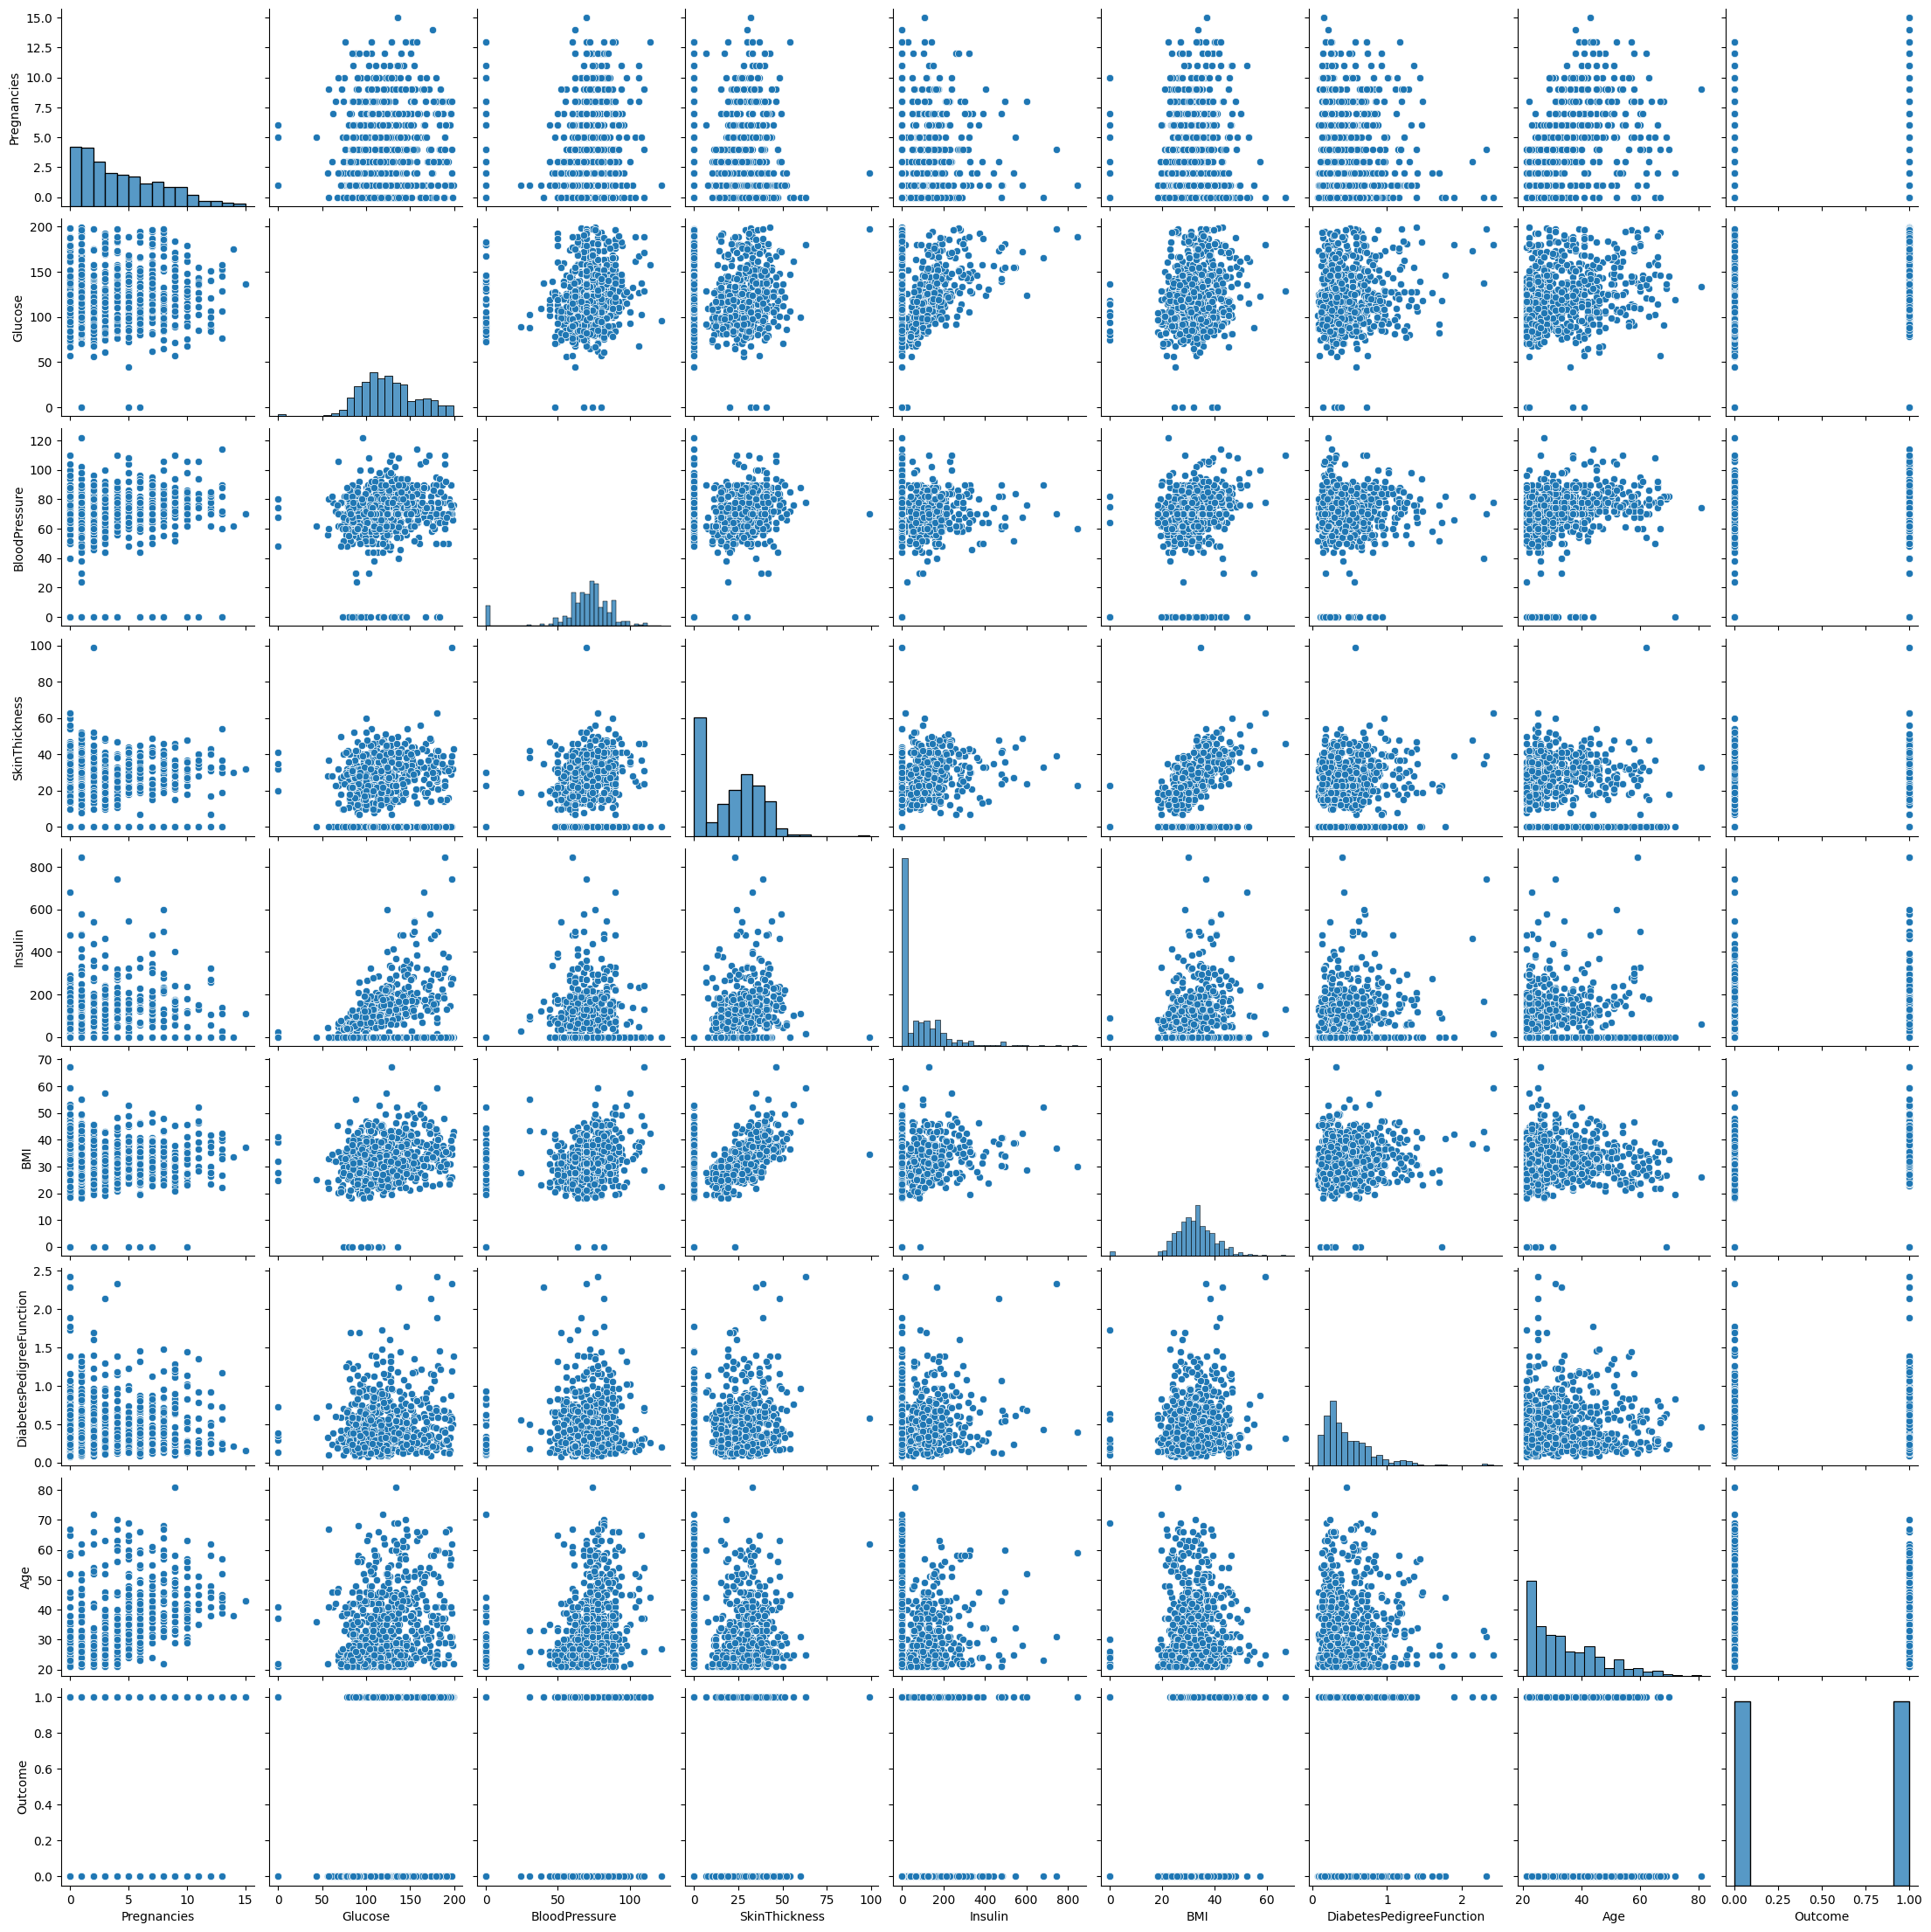

In [150]:
sns.pairplot(df)

In [151]:
df.Outcome.value_counts()

Outcome
0    500
1    500
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

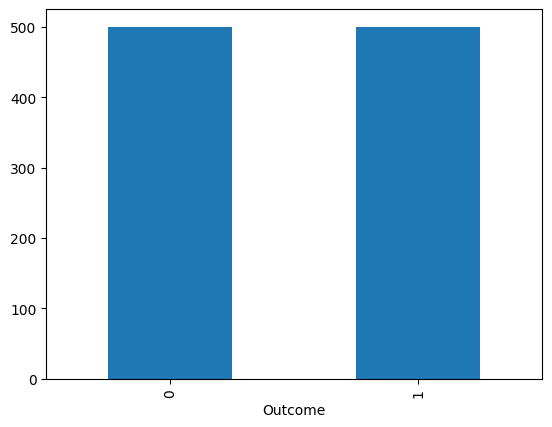

In [152]:
df.Outcome.value_counts().plot(kind="bar")

In [153]:
X = df.iloc[:, :-1]

In [154]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,159,64,0,0,27.4,0.294,40
1,1,109,60,8,182,25.4,0.947,21
2,1,119,54,13,50,22.3,0.205,24
3,1,193,50,16,375,25.9,0.655,24
4,11,135,0,0,0,52.3,0.578,40
...,...,...,...,...,...,...,...,...
995,4,136,70,0,0,31.2,1.182,22
996,1,128,98,41,58,32.0,1.321,33
997,7,124,70,33,215,25.5,0.161,37
998,1,122,90,51,220,49.7,0.325,31


In [155]:
Y = df.iloc[:, -1]

In [156]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
995    1
996    1
997    0
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
from sklearn.svm import SVC

model = SVC(kernel="poly")

model.fit(X_train, Y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [160]:
Y_pred = model.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
score = accuracy_score(Y_test, Y_pred)
score

0.785

In [163]:
params  = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [0.01, 0.1,1 , 10,100],
    'gamma':['scale', 'auto']
}

In [164]:
params

{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
 'C': [0.01, 0.1, 1, 10, 100],
 'gamma': ['scale', 'auto']}

In [165]:
from sklearn.model_selection import GridSearchCV

model = SVC()

grid = GridSearchCV(estimator= model, param_grid=params ,scoring="accuracy", cv= 5, n_jobs=-1 )

In [166]:
grid.fit(X_train, Y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [167]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [168]:
grid.best_score_

np.float64(0.7950000000000002)